<a href="https://colab.research.google.com/github/Margo-by/neural-networks/blob/main/lab9_1_neironki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Задание 1. (из темы 9.1):

Дообучите нейронную сеть VGG16 для распознавания изображений только двух классов. Используйте дообученную сеть для классификации своих изображений.


In [ ]:
#дообучение

from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model

# Размер изображений
img_width, img_height = 150, 150
# Путь к каталогу с изображениями для обучения
train_data_dir = 'data/train'
# Путь к каталогу с изображениями для валидации
validation_data_dir = 'data/validation'
# Количество изображений для обучения
nb_train_samples = 2000
# Количество изображений для валидации
nb_validation_samples = 800
# Количество эпох
epochs = 5
# Размер выборки
batch_size = 16

# Загружаем сеть VGG16 без части, которая отвечает за классификацию
base_model = applications.VGG16(weights='imagenet', include_top=False)

# Добавляем слои классификации
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
# Выходной слой с двумя нейронами для классов "кот" и "собака"
predictions = Dense(2, activation='softmax')(x)

# Составляем сеть из двух частей
model = Model(inputs=base_model.input, outputs=predictions)

# "Замораживаем" сверточные уровни сети VGG16
# Обучаем только вновь добавленные слои
for layer in base_model.layers:
    layer.trainable = False


# Компилируем модель
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Создаем генератор данных для обучения
datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode= 'categorical')
# datagen.flow_from_directory


# Создаем генератор данных для валидации
validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode= 'categorical')


# Обучаем модель с помощью генератора
model.fit_generator(
    train_generator,
    steps_per_epoch=400,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps = nb_validation_samples)


print("Сохраняем сеть")
# Сохраняем сеть для последующего использования
# Генерируем описание модели в формате json
model_json = model.to_json()
json_file = open("vgg16_cat_dogs.json", "w")
# Записываем архитектуру сети в файл
json_file.write(model_json)
json_file.close()
# Записываем данные о весах в файл
model.save_weights("vgg16_cat_dogs.h5")
print("Сохранение сети завершено")


model.save('vgg.keras')

In [3]:
#загрузка
import numpy as np
from keras.models import model_from_json, load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
%matplotlib inline

# Список классов
classes = ['кот', 'собака']
#Загружаем обученную модель
model = load_model('vgg.keras')
#Компилируем модель
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

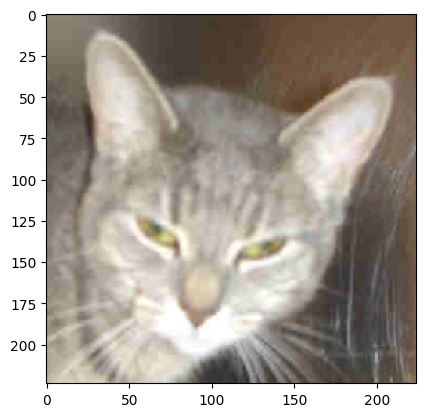

1/1 [==============================] - 1s 782ms/step
[[1.0000000e+00 1.0443423e-32]]
кот


In [4]:
#Загружаем изображение для распознавания
from keras.preprocessing import image

img = image.load_img('cat1.jpg', target_size=(224, 224))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

#Запускаем распознавание
prediction = model.predict(x)
print(prediction)
print(classes[np.argmax(prediction)])

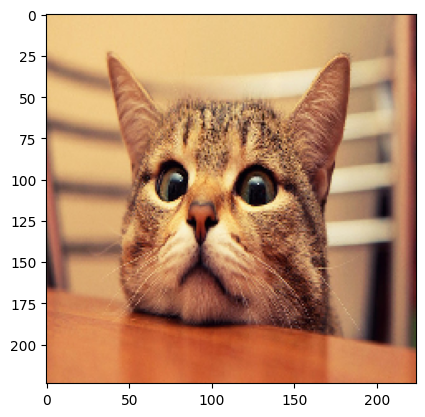

1/1 [==============================] - 0s 485ms/step
[[1.0000000e+00 2.0042297e-21]]
кот


In [5]:
#Загружаем изображение для распознавания
from keras.preprocessing import image

img = image.load_img('cat.jpg', target_size=(224, 224))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

#Запускаем распознавание
prediction = model.predict(x)
print(prediction)
print(classes[np.argmax(prediction)])

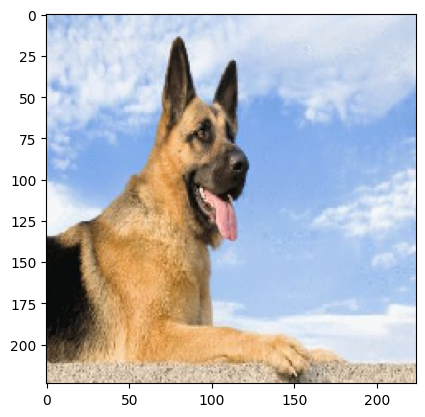

1/1 [==============================] - 0s 468ms/step
[[0. 1.]]
собака


In [6]:
#Загружаем изображение для распознавания
from keras.preprocessing import image

img = image.load_img('dog.jpg', target_size=(224, 224))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

#Запускаем распознавание
prediction = model.predict(x)
print(prediction)
print(classes[np.argmax(prediction)])

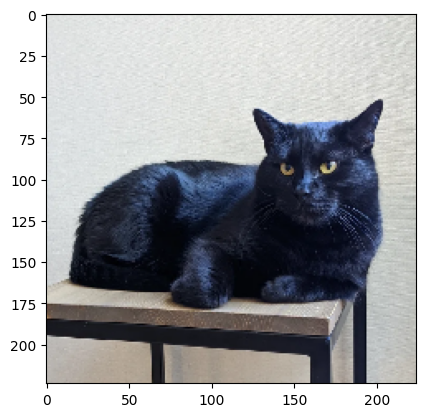

1/1 [==============================] - 0s 475ms/step
[[1.0000000e+00 3.0771422e-21]]
кот


In [7]:
#Загружаем изображение для распознавания
from keras.preprocessing import image

img = image.load_img('cat2.png', target_size=(224, 224))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

#Запускаем распознавание
prediction = model.predict(x)
print(prediction)
print(classes[np.argmax(prediction)])